# Utilização de algoritmos de inteligência artificial na previsão de resultados de partidas de futebol

Estudo e comparação do desempenho de diferentes algoritmos de inteligência artificial

TCC do curso de Ciência da Computação do Instituto Federal do Triângulo Mineiro - Campus Ituiutaba

Autor: Olesio Gardenghi Neto

## Pré-processamento dos dados

In [1]:
# Import das bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# Silenciando os warnings
warnings.filterwarnings("ignore")
# Mudando o estilo de plot dos gráficos
plt.style.use('seaborn')
# Comando para mostrar os gráficos dentro do Jupyter
%matplotlib inline

In [2]:
# Lendo a base de dados e transformando em dataframe
df = pd.read_csv("data/SerieA.csv")

In [3]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,I1,18/08/2018,Chievo,Juventus,2,3,A,1,1,D,...,2.13,19,2.00,1.68,1.64,2.38,2.29,18.84,6.42,1.22
1,I1,18/08/2018,Lazio,Napoli,1,2,A,1,1,D,...,2.17,20,0.00,2.12,2.07,1.83,1.79,2.78,3.57,2.59
2,I1,19/08/2018,Bologna,Spal,0,1,A,0,0,D,...,1.58,19,-0.25,1.97,1.92,1.99,1.94,2.31,3.18,3.59
3,I1,19/08/2018,Empoli,Cagliari,2,0,H,1,0,H,...,1.71,19,-0.25,1.98,1.91,1.98,1.94,2.54,3.42,2.95
4,I1,19/08/2018,Parma,Udinese,2,2,D,1,0,H,...,1.65,20,0.00,1.81,1.77,2.18,2.10,2.80,3.24,2.78


In [4]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD',
       'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA',
       'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh',
       'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

#### Descrição das colunas
Key to results data:

Div = League Division  
Date = Match Date (dd/mm/yy)  
Time = Time of match kick off  
HomeTeam = Home Team  
AwayTeam = Away Team  
FTHG and HG = Full Time Home Team Goals  
FTAG and AG = Full Time Away Team Goals  
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)  
HTHG = Half Time Home Team Goals  
HTAG = Half Time Away Team Goals  
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)  

Match Statistics (where available)  
Attendance = Crowd Attendance  
Referee = Match Referee  
HS = Home Team Shots  
AS = Away Team Shots  
HST = Home Team Shots on Target  
AST = Away Team Shots on Target  
HHW = Home Team Hit Woodwork  
AHW = Away Team Hit Woodwork  
HC = Home Team Corners  
AC = Away Team Corners  
HF = Home Team Fouls Committed  
AF = Away Team Fouls Committed  
HFKC = Home Team Free Kicks Conceded  
AFKC = Away Team Free Kicks Conceded  
HO = Home Team Offsides  
AO = Away Team Offsides  
HY = Home Team Yellow Cards  
AY = Away Team Yellow Cards  
HR = Home Team Red Cards  
AR = Away Team Red Cards  
HBP = Home Team Bookings Points (10 = yellow, 25 = red)  
ABP = Away Team Bookings Points (10 = yellow, 25 = red)  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 61 columns):
Div         380 non-null object
Date        380 non-null object
HomeTeam    380 non-null object
AwayTeam    380 non-null object
FTHG        380 non-null int64
FTAG        380 non-null int64
FTR         380 non-null object
HTHG        380 non-null int64
HTAG        380 non-null int64
HTR         380 non-null object
HS          380 non-null int64
AS          380 non-null int64
HST         380 non-null int64
AST         380 non-null int64
HF          380 non-null int64
AF          380 non-null int64
HC          380 non-null int64
AC          380 non-null int64
HY          380 non-null int64
AY          380 non-null int64
HR          380 non-null int64
AR          380 non-null int64
B365H       380 non-null float64
B365D       380 non-null float64
B365A       380 non-null float64
BWH         380 non-null float64
BWD         380 non-null float64
BWA         380 non-null float64
IWH      

In [6]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.484211,1.197368,0.623684,0.505263,11.234211,9.184211,5.736842,4.736842,12.844737,13.252632,...,1.994895,20.486842,-0.326316,2.051737,1.987579,1.981105,1.919868,3.023684,4.088211,5.168632
std,1.196857,1.155687,0.781020,0.724595,4.278607,3.955259,2.869034,2.579442,3.782978,4.291412,...,0.304155,1.680977,0.928388,0.276503,0.258860,0.250005,0.233636,2.299855,1.256473,4.649005
min,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,4.000000,4.000000,...,1.500000,15.000000,-2.500000,1.500000,1.440000,1.470000,1.410000,1.100000,2.730000,1.190000
25%,1.000000,0.000000,0.000000,0.000000,8.000000,6.000000,4.000000,3.000000,10.000000,10.000000,...,1.760000,19.000000,-1.000000,1.850000,1.790000,1.810000,1.767500,1.610000,3.327500,2.300000
50%,1.000000,1.000000,0.000000,0.000000,11.000000,9.000000,5.000000,5.000000,13.000000,13.000000,...,1.960000,20.000000,-0.250000,2.020000,1.960000,1.950000,1.890000,2.310000,3.610000,3.470000
75%,2.000000,2.000000,1.000000,1.000000,14.000000,11.000000,7.000000,6.000000,15.000000,16.000000,...,2.170000,22.000000,0.250000,2.182500,2.110000,2.142500,2.080000,3.392500,4.335000,6.342500
max,6.000000,6.000000,4.000000,3.000000,32.000000,23.000000,18.000000,13.000000,25.000000,27.000000,...,3.280000,25.000000,2.000000,3.100000,2.930000,2.960000,2.840000,18.840000,10.680000,31.410000


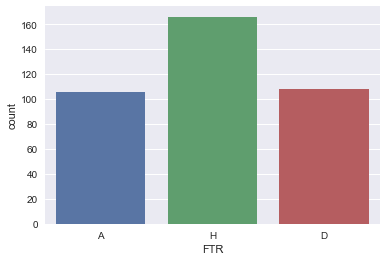

In [7]:
# H - Home(Casa), A - Away(Fora) e D - Draw(Empate)
sns.countplot(x='FTR', data=df)

In [8]:
# Selecionando apenas as características que nos interessa
df = df[['FTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','HTHG','HTAG']]

In [9]:
df.head()

,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTHG,HTAG
0,A,7,23,2,11,7,9,0,8,2,0,0,0,1,1
1,A,9,11,5,6,8,5,4,7,0,0,0,0,1,1
2,A,8,10,3,5,16,11,7,0,4,2,1,0,0,0
3,H,9,12,4,5,19,19,6,6,3,3,0,0,1,0
4,D,9,16,6,6,10,13,4,5,2,2,0,0,1,0


In [10]:
# Transformando os dados categóricos de FTR para numéricos
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['FTR'])
df['FTR'] = label_encoder.transform(df['FTR'])

# Transformando os dados categóricos de HTR para numéricos
#label_encoder = preprocessing.LabelEncoder()
#label_encoder.fit(df['HTR'])
#df['HTR'] = label_encoder.transform(df['HTR'])

df.head()
# 0 - Fora, 2 - Casa, 1 - Empate

,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTHG,HTAG
0,0,7,23,2,11,7,9,0,8,2,0,0,0,1,1
1,0,9,11,5,6,8,5,4,7,0,0,0,0,1,1
2,0,8,10,3,5,16,11,7,0,4,2,1,0,0,0
3,2,9,12,4,5,19,19,6,6,3,3,0,0,1,0
4,1,9,16,6,6,10,13,4,5,2,2,0,0,1,0


In [11]:
# Normalizando os dados com o StandardScaler
# A distribuição dos dados será transformada tal que sua média = 0 e o desvio padrão = 1
# z = (x-u)/σ
# x = dados, u = média, σ = desvio padrão
scaler = StandardScaler()
scaler.fit(df.drop(['FTR'],axis=1))
dados_normalizados = scaler.transform(df.drop(['FTR'],axis=1))
df_normalizado = pd.DataFrame(dados_normalizados, columns=df.columns[1:])
df = df[['FTR']]
df = pd.concat([df, df_normalizado], axis=1, sort=False)
df.head()

,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTHG,HTAG
0,0,-0.990928,3.497622,-1.304191,2.431307,-1.547046,-0.992270,-1.799688,1.214599,-0.108461,-1.724616,-0.320372,-0.355515,0.482462,0.683677
1,0,-0.522870,0.459688,-0.257164,0.490348,-1.282356,-1.925593,-0.558524,0.823457,-1.693667,-1.724616,-0.320372,-0.355515,0.482462,0.683677
2,0,-0.756899,0.206526,-0.955182,0.102156,0.835168,-0.525608,0.372349,-1.914537,1.476744,-0.352147,2.801205,-0.355515,-0.799604,-0.698223
3,2,-0.522870,0.712849,-0.606173,0.102156,1.629240,1.341038,0.062058,0.432315,0.684141,0.334088,-0.320372,-0.355515,0.482462,-0.698223
4,1,-0.522870,1.725494,0.091844,0.490348,-0.752975,-0.058947,-0.558524,0.041173,-0.108461,-0.352147,-0.320372,-0.355515,0.482462,-0.698223


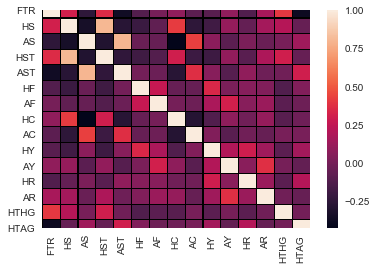

In [12]:
#Mapa de calor de correlações
sns.heatmap(df.corr(),linewidths=0.1,linecolor="black")

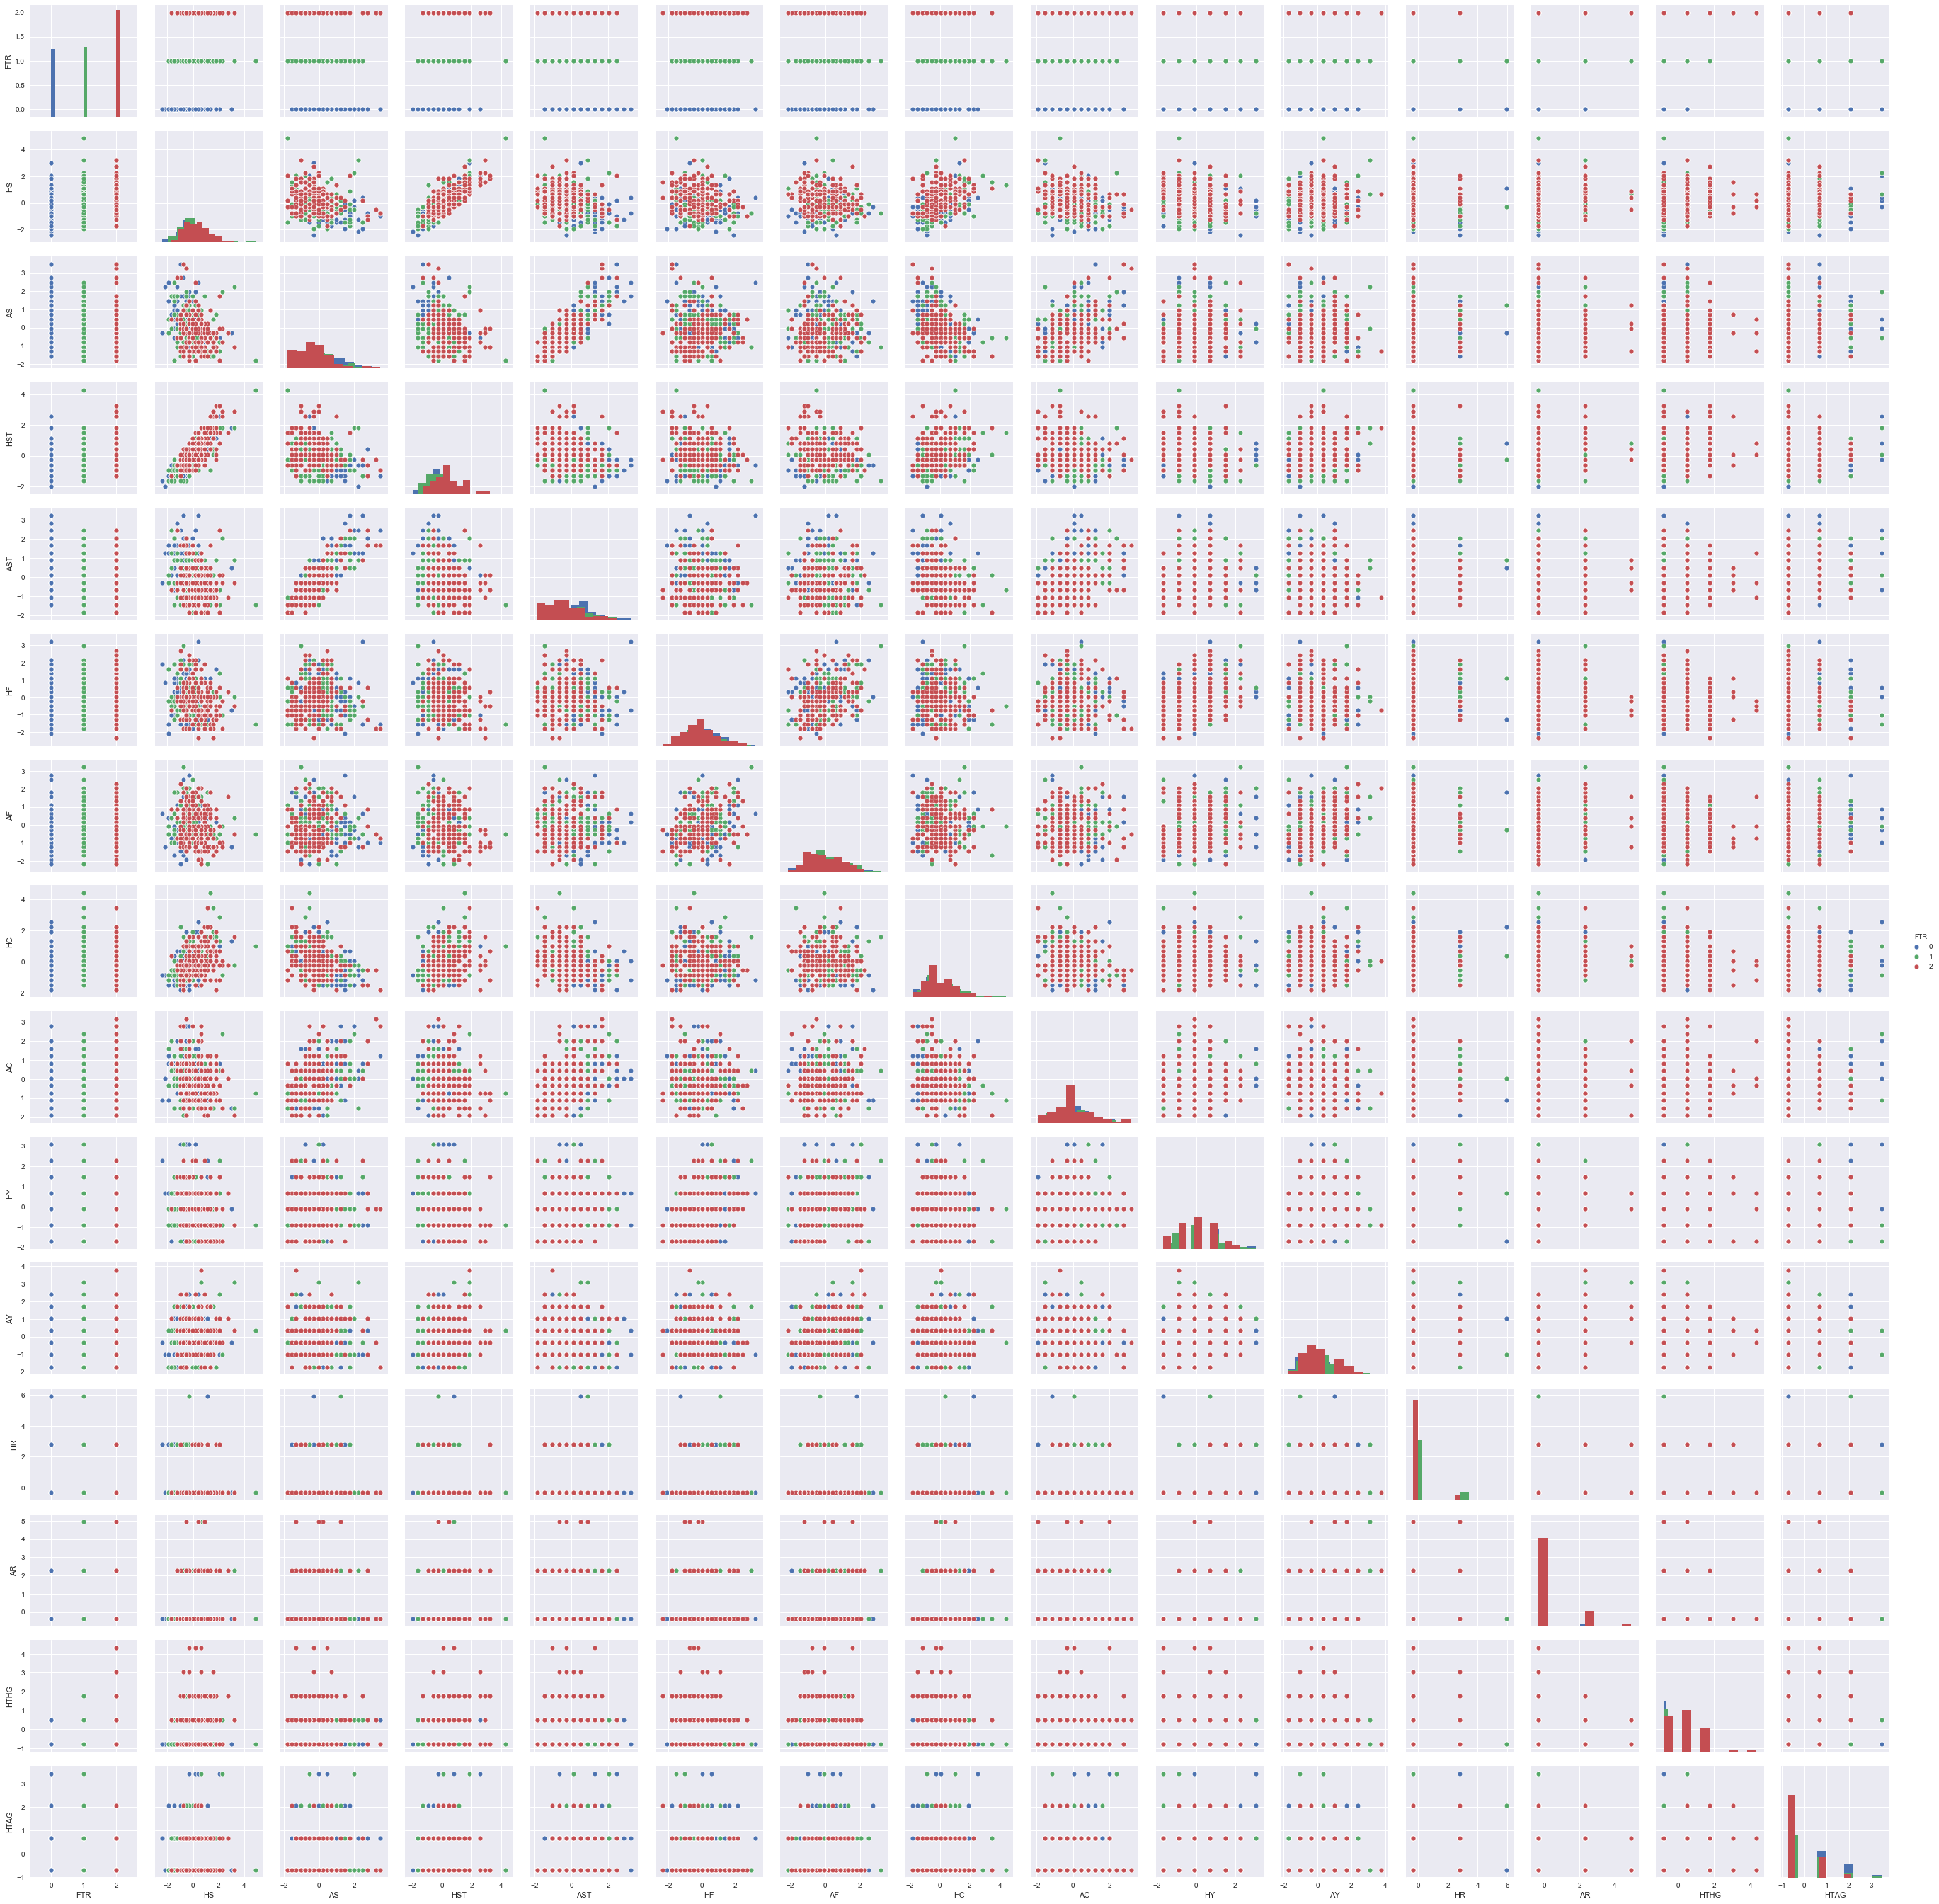

In [13]:
#Distribuição dos dados em pares
sns.pairplot(data=df,hue="FTR", diag_kind='hist')

## Aplicando os algoritmos de IA

In [14]:
# Características
X = df.drop('FTR',axis=1)
# Alvo da previsão
y = df['FTR']

In [15]:
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [16]:
df_y_test = y_test.reset_index()
df_y_test.drop('index',axis=1, inplace=True)

### Regressão Logística

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logistic_regression = LogisticRegression(solver='lbfgs', multi_class='auto')
logistic_regression.fit(X_train, y_train)
predict_logistic_regression = logistic_regression.predict(X_test)
reg_log_all = logistic_regression.score(X_test, y_test) * 100
cross_log_all = max(cross_val_score(logistic_regression, X, y, cv=10)) * 100

In [19]:
print(classification_report(y_test,predict_logistic_regression))
print(confusion_matrix(y_test,predict_logistic_regression))
print('\nScore Regressão Logística: %.2f' %reg_log_all + "%")
print('\nScore Regressão Logística Cross Validation: %.2f' %cross_log_all + "%")

              precision    recall  f1-score   support

           0       0.58      0.64      0.61        33
           1       0.38      0.32      0.35        28
           2       0.76      0.77      0.77        53

    accuracy                           0.62       114
   macro avg       0.57      0.58      0.57       114
weighted avg       0.61      0.62      0.62       114

[[21  8  4]
 [10  9  9]
 [ 5  7 41]]

Score Regressão Logística: 62.28%

Score Regressão Logística Cross Validation: 71.79%


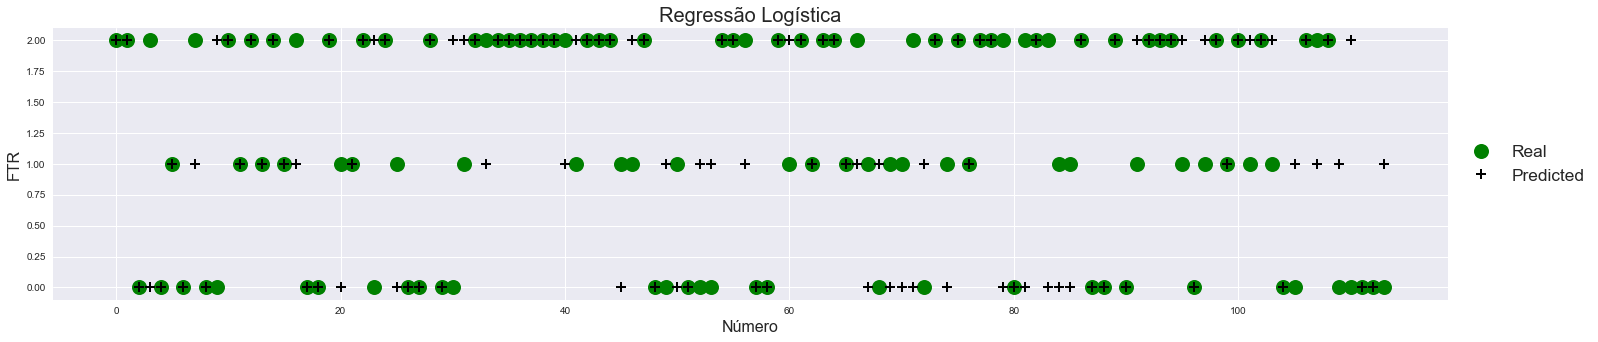

In [20]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_logistic_regression, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('Regressão Logística',fontsize=20)
plt.show()

### Árvore de Decisão

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predict_decision_tree = decision_tree.predict(X_test)
dec_tree_all = decision_tree.score(X_test, y_test) * 100
cross_dec_tree_all = max(cross_val_score(decision_tree, X, y, cv=10)) * 100

In [23]:
print(classification_report(y_test,predict_decision_tree))
print(confusion_matrix(y_test,predict_decision_tree))
print('\nScore Árvore de Decisão: %.2f' %dec_tree_all + "%")
print('\nScore Árvore de Decisão Cross Validation: %.2f' %cross_dec_tree_all + "%")

              precision    recall  f1-score   support

           0       0.47      0.48      0.48        33
           1       0.24      0.32      0.28        28
           2       0.77      0.62      0.69        53

    accuracy                           0.51       114
   macro avg       0.49      0.48      0.48       114
weighted avg       0.55      0.51      0.53       114

[[16 14  3]
 [12  9  7]
 [ 6 14 33]]

Score Árvore de Decisão: 50.88%

Score Árvore de Decisão Cross Validation: 61.54%


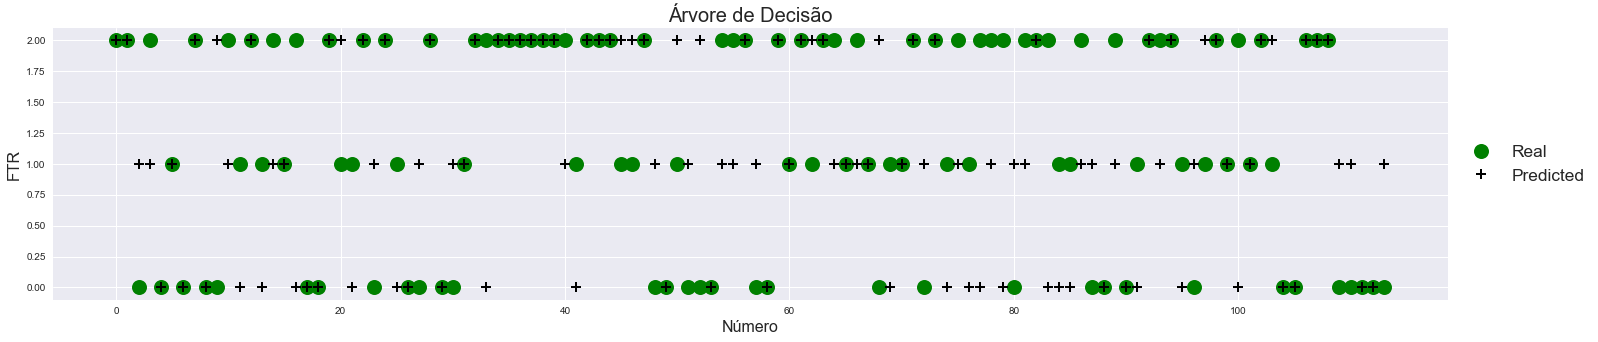

In [24]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_decision_tree, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('Árvore de Decisão',fontsize=20)
plt.show()

### Floresta Aleatória

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
#Método do cotovelo
error_rate = []

for i in range(1,200):
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(X_train, y_train)
    predict_random_forest = random_forest.predict(X_test)
    error_rate.append(np.mean(predict_random_forest!=y_test))

Text(0.5, 1.0, 'Taxa de erro vs. Número estimativas')

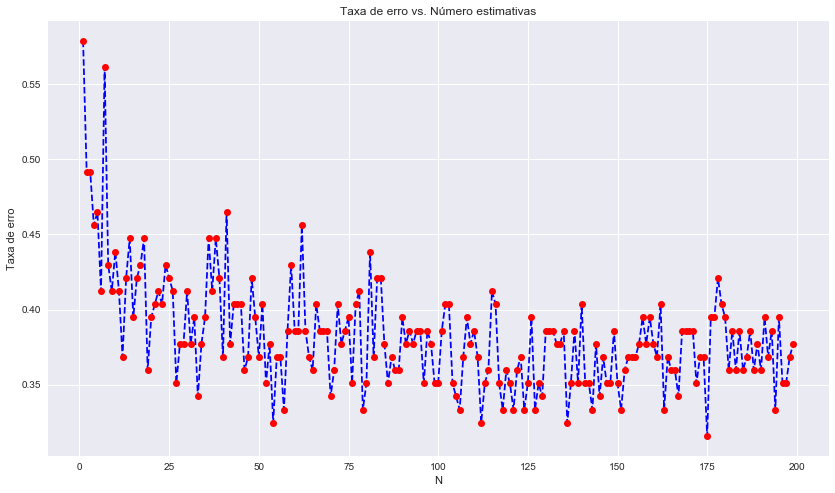

In [27]:
plt.figure(figsize=(14,8))
plt.plot(range(1,200),error_rate,color="blue",linestyle='dashed',marker='o',markerfacecolor='red')
plt.xlabel('N')
plt.ylabel("Taxa de erro")
plt.title("Taxa de erro vs. Número estimativas")

In [28]:
random_forest = RandomForestClassifier(n_estimators=error_rate.index(min(error_rate)))
random_forest.fit(X_train, y_train)
predict_random_forest = random_forest.predict(X_test)
rand_for_all = random_forest.score(X_test, y_test) * 100
cross_rand_for_all = max(cross_val_score(random_forest, X, y, cv=10)) * 100

In [29]:
print(classification_report(y_test,predict_random_forest))
print(confusion_matrix(y_test,predict_random_forest))
print('\nScore Floresta Aleatória: %.2f' %rand_for_all + "%")
print("\nScore Floresta Aleatória: %.2f" %cross_rand_for_all + "%")

              precision    recall  f1-score   support

           0       0.59      0.61      0.60        33
           1       0.46      0.39      0.42        28
           2       0.77      0.81      0.79        53

    accuracy                           0.65       114
   macro avg       0.60      0.60      0.60       114
weighted avg       0.64      0.65      0.64       114

[[20  7  6]
 [10 11  7]
 [ 4  6 43]]

Score Floresta Aleatória: 64.91%

Score Floresta Aleatória: 66.67%


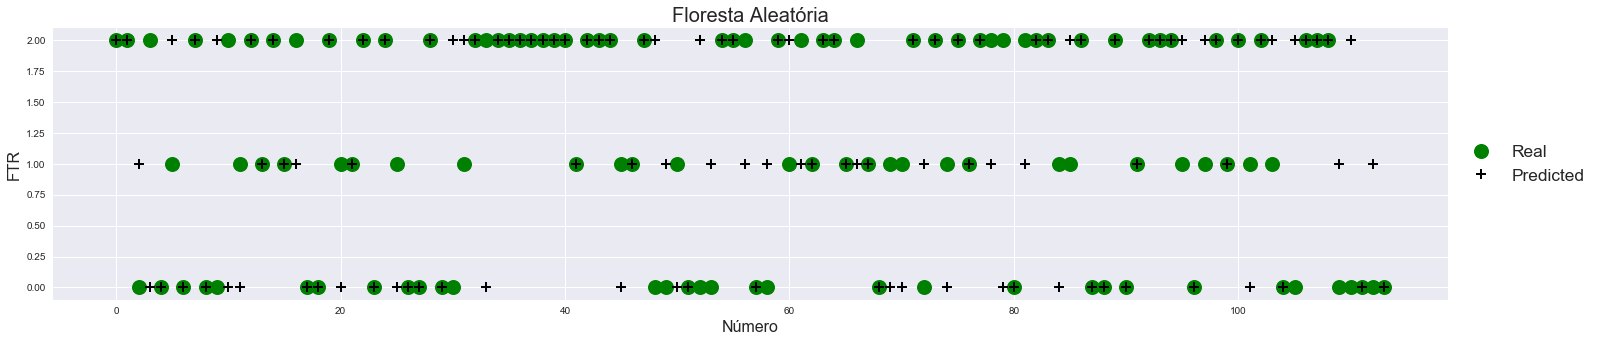

In [30]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_random_forest, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('Floresta Aleatória',fontsize=20)
plt.show()

### K Nearest Neighbours (KNN)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict_knn = knn.predict(X_test)
    error_rate.append(np.mean(predict_knn!=y_test))

Text(0.5, 1.0, 'Taxa de erro vs. Número estimativas')

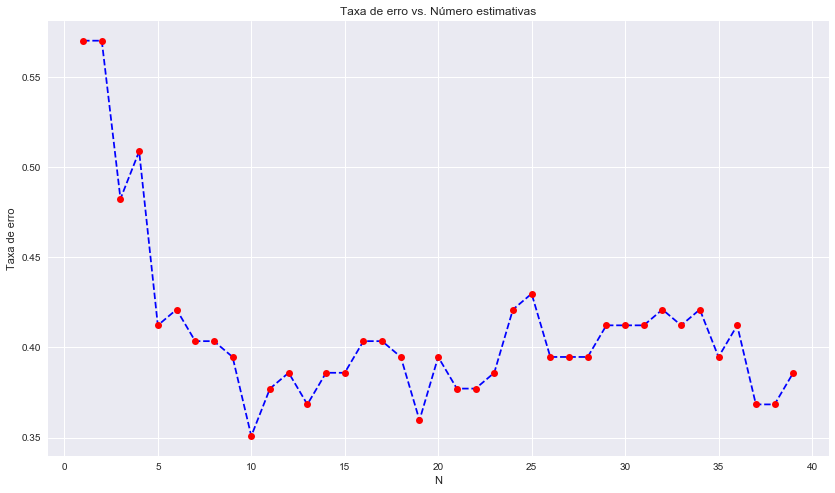

In [33]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40),error_rate,color="blue",linestyle='dashed',marker='o',markerfacecolor='red')
plt.xlabel('N')
plt.ylabel("Taxa de erro")
plt.title("Taxa de erro vs. Número estimativas")

In [34]:
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)))
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)
knn_all = knn.score(X_test, y_test) * 100
cross_knn_all = max(cross_val_score(knn, X, y, cv=10)) * 100

In [35]:
print(classification_report(y_test,predict_knn))
print(confusion_matrix(y_test,predict_knn))
print('\nScore KNN: %.2f' %knn_all + "%")
print("\nScore KNN Cross Validation: %.2f" %cross_knn_all + "%")

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        33
           1       0.39      0.50      0.44        28
           2       0.84      0.68      0.75        53

    accuracy                           0.61       114
   macro avg       0.59      0.59      0.58       114
weighted avg       0.64      0.61      0.62       114

[[19 10  4]
 [11 14  3]
 [ 5 12 36]]

Score KNN: 60.53%

Score KNN Cross Validation: 69.23%


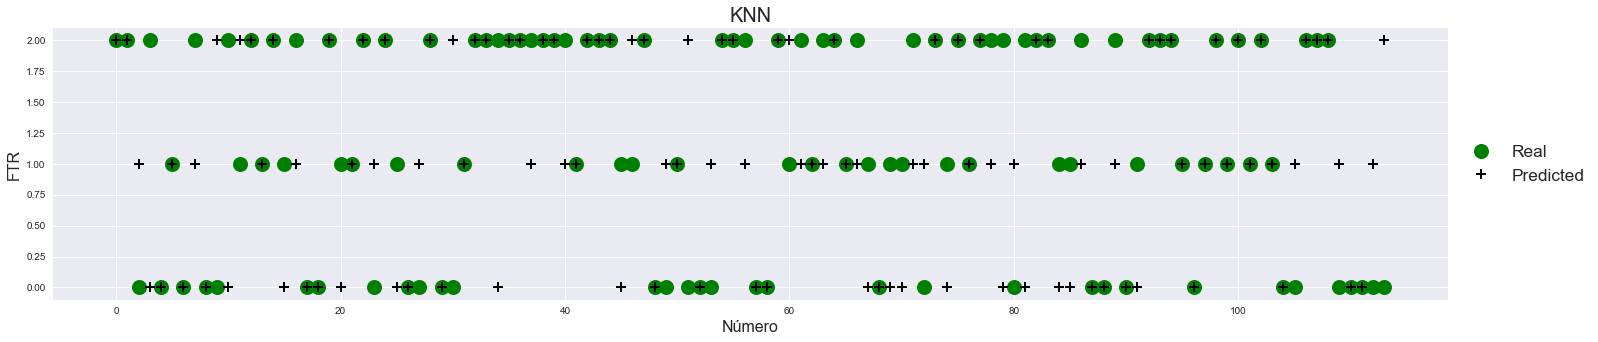

In [36]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_knn, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('KNN',fontsize=20)
plt.show()

### Support-vector Machine (SVM)

In [37]:
from sklearn.svm import SVC

In [38]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma': [1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,cv=3,iid=False)
grid.fit(X_train, y_train)
predict_svm = grid.predict(X_test)
svm_all = grid.score(X_test, y_test) * 100

grid2 = GridSearchCV(SVC(),param_grid,refit=True,cv=10,iid=False)
grid2.fit(X_train, y_train)
cross_svm_all = grid2.score(X_test, y_test) * 100

In [39]:
print(confusion_matrix(y_test,predict_svm))
print('\nScore SVM: %.2f' %svm_all + "%")
print("\nScore SVM: %.2f" %cross_svm_all + "%")

[[20  8  5]
 [ 6 12 10]
 [ 3  8 42]]

Score SVM: 64.91%

Score SVM: 64.91%


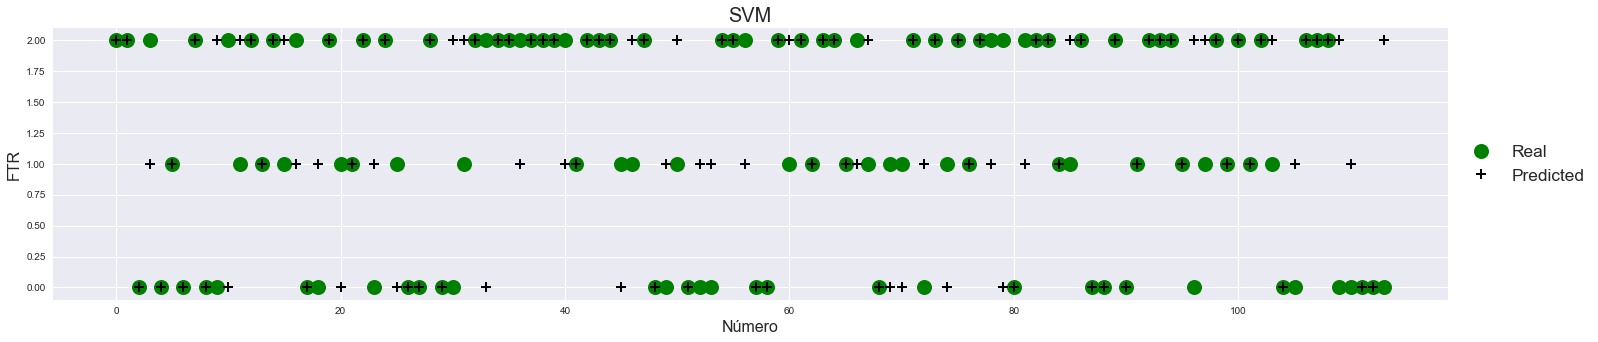

In [40]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_svm, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('SVM',fontsize=20)
plt.show()

### Multi-layer Perceptron Classifier

In [41]:
from sklearn.neural_network import MLPClassifier

In [42]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(1,8), activation='logistic', solver='adam', max_iter=1000)
mlp_classifier.fit(X_train,y_train)
predict_mlp_classifier = mlp_classifier.predict(X_test)
mlp_all = mlp_classifier.score(X_test, y_test) * 100
cross_mlp_all = max(cross_val_score(mlp_classifier, X, y, cv=10)) * 100

In [43]:
#print(classification_report(y_test,predict_mlp))
print(confusion_matrix(y_test,predict_mlp_classifier))
print('\nScore MLP: %.2f' %mlp_all + "%")
print("\nScore MLP Cross Validation: %.2f" %cross_mlp_all + "%")

[[23  3  7]
 [12  4 12]
 [ 5  5 43]]

Score MLP: 61.40%

Score MLP Cross Validation: 64.10%


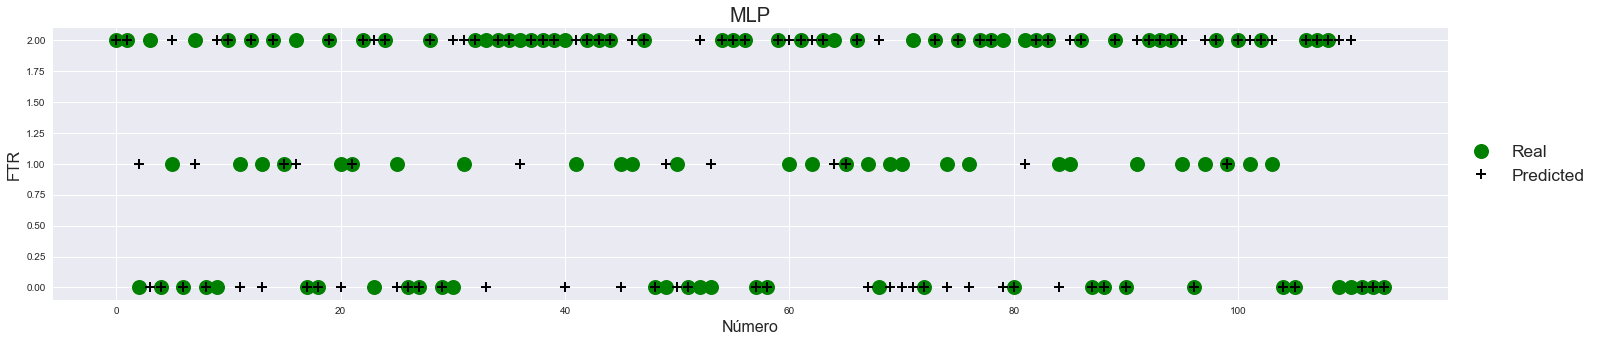

In [44]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_mlp_classifier, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('MLP',fontsize=20)
plt.show()

In [45]:
print('\nRegressão logística: %.2f' %reg_log_all + "%")
print('\nÁrvore de decisão: %.2f' %dec_tree_all + "%")
print('\nFloresta aleatória: %.2f' %rand_for_all + "%")
print('\nKNN: %.2f' %knn_all + "%")
print('\nSVM: %.2f' %svm_all + "%")
print('\nMLP: %.2f' %mlp_all + "%")


Regressão logística: 62.28%

Árvore de decisão: 50.88%

Floresta aleatória: 64.91%

KNN: 60.53%

SVM: 64.91%

MLP: 61.40%


In [46]:
print("Cross Validation")
print('\nRegressão logística: %.2f' %cross_log_all + "%")
print('\nÁrvore de decisão: %.2f' %cross_dec_tree_all + "%")
print('\nFloresta aleatória: %.2f' %cross_rand_for_all + "%")
print('\nKNN: %.2f' %cross_knn_all + "%")
print('\nSVM: %.2f' %cross_svm_all + "%")
print('\nMLP: %.2f' %cross_mlp_all + "%")

Cross Validation

Regressão logística: 71.79%

Árvore de decisão: 61.54%

Floresta aleatória: 66.67%

KNN: 69.23%

SVM: 64.91%

MLP: 64.10%


## Outra abordagem

### Casa x Fora

In [47]:
# 2 - Casa, 0 - Fora, 1 - Empate
df_cxf = df[df['FTR'] != 1]
df_cxf.head()

,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTHG,HTAG
0,0,-0.990928,3.497622,-1.304191,2.431307,-1.547046,-0.992270,-1.799688,1.214599,-0.108461,-1.724616,-0.320372,-0.355515,0.482462,0.683677
1,0,-0.522870,0.459688,-0.257164,0.490348,-1.282356,-1.925593,-0.558524,0.823457,-1.693667,-1.724616,-0.320372,-0.355515,0.482462,0.683677
2,0,-0.756899,0.206526,-0.955182,0.102156,0.835168,-0.525608,0.372349,-1.914537,1.476744,-0.352147,2.801205,-0.355515,-0.799604,-0.698223
3,2,-0.522870,0.712849,-0.606173,0.102156,1.629240,1.341038,0.062058,0.432315,0.684141,0.334088,-0.320372,-0.355515,0.482462,-0.698223
5,2,-0.990928,0.459688,-0.257164,-0.286036,2.688002,-0.525608,-0.558524,-0.349969,0.684141,-0.352147,-0.320372,-0.355515,0.482462,-0.698223


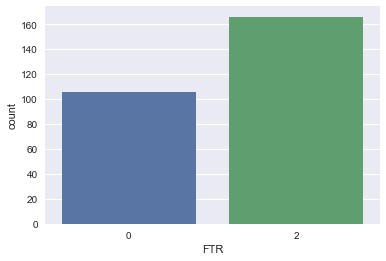

In [48]:
sns.countplot(x='FTR', data=df_cxf)

In [49]:
# Características
X = df_cxf.drop('FTR',axis=1)
# Alvo da previsão
y = df_cxf['FTR']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

# Regressão Logística
logistic_regression = LogisticRegression(solver='lbfgs', multi_class='auto')
logistic_regression.fit(X_train, y_train)
predict_logistic_regression = logistic_regression.predict(X_test)
reg_log_cxf = logistic_regression.score(X_test, y_test) * 100
cross_log_cxf = max(cross_val_score(logistic_regression, X, y, cv=10)) * 100

# Árvore de Decisão
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predict_decision_tree = decision_tree.predict(X_test)
dec_tree_cxf = decision_tree.score(X_test, y_test) * 100
cross_dec_tree_cxf = max(cross_val_score(decision_tree, X, y, cv=10)) * 100

# Floresta Aleatória
error_rate = []

for i in range(1,200):
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(X_train, y_train)
    predict_random_forest = random_forest.predict(X_test)
    error_rate.append(np.mean(predict_random_forest!=y_test))
    
random_forest = RandomForestClassifier(n_estimators=error_rate.index(min(error_rate)))
random_forest.fit(X_train, y_train)
predict_random_forest = random_forest.predict(X_test)
rand_for_cxf = random_forest.score(X_test, y_test) * 100
cross_rand_for_cxf = max(cross_val_score(random_forest, X, y, cv=10)) * 100

# KNN
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict_knn = knn.predict(X_test)
    error_rate.append(np.mean(predict_knn!=y_test))
    
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)))
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)
knn_cxf = knn.score(X_test, y_test) * 100
cross_knn_cxf = max(cross_val_score(knn, X, y, cv=10)) * 100

# SVM
param_grid = {'C':[0.1,1,10,100,1000],'gamma': [1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,cv=3,iid=False)
grid.fit(X_train, y_train)
predict_svm = grid.predict(X_test)
svm_cxf = grid.score(X_test, y_test) * 100

grid2 = GridSearchCV(SVC(),param_grid,refit=True,cv=10,iid=False)
grid2.fit(X_train, y_train)
cross_svm_cxf = grid2.score(X_test, y_test) * 100

# MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=(2,8), activation='logistic', solver='adam', max_iter=1000)
mlp_classifier.fit(X_train,y_train)
predict_mlp_classifier = mlp_classifier.predict(X_test)
mlp_cxf = mlp_classifier.score(X_test, y_test) * 100
cross_mlp_cxf = max(cross_val_score(mlp_classifier, X, y, cv=10)) * 100

In [50]:
print('\nRegressão logística: %.2f' %reg_log_cxf + "%")
print('\nÁrvore de decisão: %.2f' %dec_tree_cxf + "%")
print('\nFloresta aleatória: %.2f' %rand_for_cxf + "%")
print('\nKNN: %.2f' %knn_cxf + "%")
print('\nSVM: %.2f' %svm_cxf + "%")
print('\nMLP: %.2f' %mlp_cxf + "%")


Regressão logística: 82.93%

Árvore de decisão: 74.39%

Floresta aleatória: 73.17%

KNN: 80.49%

SVM: 78.05%

MLP: 78.05%


In [51]:
print("Cross Validation")
print('\nRegressão logística: %.2f' %cross_log_cxf + "%")
print('\nÁrvore de decisão: %.2f' %cross_dec_tree_cxf + "%")
print('\nFloresta aleatória: %.2f' %cross_rand_for_cxf + "%")
print('\nKNN: %.2f' %cross_knn_cxf + "%")
print('\nSVM: %.2f' %cross_svm_cxf + "%")
print('\nMLP: %.2f' %cross_mlp_cxf + "%")

Cross Validation

Regressão logística: 89.29%

Árvore de decisão: 75.00%

Floresta aleatória: 85.71%

KNN: 89.29%

SVM: 84.15%

MLP: 92.86%


### Casa x Empate

In [52]:
# 2 - Casa, 0 - Fora, 1 - Empate
df_cxe = df[df['FTR'] != 0]
df_cxe.head()

,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTHG,HTAG
3,2,-0.522870,0.712849,-0.606173,0.102156,1.629240,1.341038,0.062058,0.432315,0.684141,0.334088,-0.320372,-0.355515,0.482462,-0.698223
4,1,-0.522870,1.725494,0.091844,0.490348,-0.752975,-0.058947,-0.558524,0.041173,-0.108461,-0.352147,-0.320372,-0.355515,0.482462,-0.698223
5,2,-0.990928,0.459688,-0.257164,-0.286036,2.688002,-0.525608,-0.558524,-0.349969,0.684141,-0.352147,-0.320372,-0.355515,0.482462,-0.698223
7,2,1.115333,-0.806119,1.487880,-1.450612,0.305787,-0.758939,-0.558524,-0.349969,-1.693667,-0.352147,-0.320372,-0.355515,0.482462,-0.698223
8,2,0.647275,-0.299796,1.138871,-0.674228,-0.223594,-0.058947,0.062058,-1.132253,0.684141,-0.352147,-0.320372,-0.355515,0.482462,-0.698223


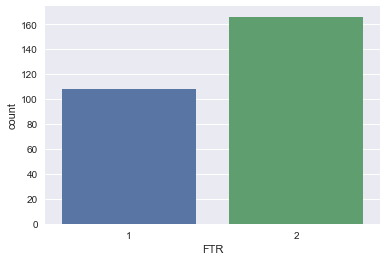

In [53]:
sns.countplot(x='FTR', data=df_cxe)

In [54]:
# Características
X = df_cxe.drop('FTR',axis=1)
# Alvo da previsão
y = df_cxe['FTR']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

# Regressão Logística
logistic_regression = LogisticRegression(solver='lbfgs', multi_class='auto')
logistic_regression.fit(X_train, y_train)
predict_logistic_regression = logistic_regression.predict(X_test)
reg_log_cxe = logistic_regression.score(X_test, y_test) * 100
cross_log_cxe = max(cross_val_score(logistic_regression, X, y, cv=10)) * 100

# Árvore de Decisão
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predict_decision_tree = decision_tree.predict(X_test)
dec_tree_cxe = decision_tree.score(X_test, y_test) * 100
cross_dec_tree_cxe = max(cross_val_score(decision_tree, X, y, cv=10)) * 100

# Floresta Aleatória
error_rate = []

for i in range(1,200):
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(X_train, y_train)
    predict_random_forest = random_forest.predict(X_test)
    error_rate.append(np.mean(predict_random_forest!=y_test))
    
random_forest = RandomForestClassifier(n_estimators=error_rate.index(min(error_rate)))
random_forest.fit(X_train, y_train)
predict_random_forest = random_forest.predict(X_test)
rand_for_cxe = random_forest.score(X_test, y_test) * 100
cross_rand_for_cxe = max(cross_val_score(random_forest, X, y, cv=10)) * 100

# KNN
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict_knn = knn.predict(X_test)
    error_rate.append(np.mean(predict_knn!=y_test))
    
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)))
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)
knn_cxe = knn.score(X_test, y_test) * 100
cross_knn_cxe = max(cross_val_score(knn, X, y, cv=10)) * 100

# SVM
param_grid = {'C':[0.1,1,10,100,1000],'gamma': [1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,cv=3,iid=False)
grid.fit(X_train, y_train)
predict_svm = grid.predict(X_test)
svm_cxe = grid.score(X_test, y_test) * 100

grid2 = GridSearchCV(SVC(),param_grid,refit=True,cv=10,iid=False)
grid2.fit(X_train, y_train)
cross_svm_cxe = grid2.score(X_test, y_test) * 100

# MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=(2,8), activation='logistic', solver='adam', max_iter=1000)
mlp_classifier.fit(X_train,y_train)
predict_mlp_classifier = mlp_classifier.predict(X_test)
mlp_cxe = mlp_classifier.score(X_test, y_test) * 100
cross_mlp_cxe = max(cross_val_score(mlp_classifier, X, y, cv=10)) * 100

In [55]:
print('\nRegressão logística: %.2f' %reg_log_cxe + "%")
print('\nÁrvore de decisão: %.2f' %dec_tree_cxe + "%")
print('\nFloresta aleatória: %.2f' %rand_for_cxe + "%")
print('\nKNN: %.2f' %knn_cxe + "%")
print('\nSVM: %.2f' %svm_cxe + "%")
print('\nMLP: %.2f' %mlp_cxe + "%")


Regressão logística: 67.47%

Árvore de decisão: 62.65%

Floresta aleatória: 72.29%

KNN: 69.88%

SVM: 67.47%

MLP: 57.83%


In [56]:
print("Cross Validation")
print('\nRegressão logística: %.2f' %cross_log_cxe + "%")
print('\nÁrvore de decisão: %.2f' %cross_dec_tree_cxe + "%")
print('\nFloresta aleatória: %.2f' %cross_rand_for_cxe + "%")
print('\nKNN: %.2f' %cross_knn_cxe + "%")
print('\nSVM: %.2f' %cross_svm_cxe + "%")
print('\nMLP: %.2f' %cross_mlp_cxe + "%")

Cross Validation

Regressão logística: 75.00%

Árvore de decisão: 78.57%

Floresta aleatória: 82.14%

KNN: 82.14%

SVM: 67.47%

MLP: 71.43%


### Fora x Empate

In [57]:
# 2 - Casa, 0 - Fora, 1 - Empate
df_fxe = df[df['FTR'] != 2]
df_fxe.head()

,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTHG,HTAG
0,0,-0.990928,3.497622,-1.304191,2.431307,-1.547046,-0.992270,-1.799688,1.214599,-0.108461,-1.724616,-0.320372,-0.355515,0.482462,0.683677
1,0,-0.522870,0.459688,-0.257164,0.490348,-1.282356,-1.925593,-0.558524,0.823457,-1.693667,-1.724616,-0.320372,-0.355515,0.482462,0.683677
2,0,-0.756899,0.206526,-0.955182,0.102156,0.835168,-0.525608,0.372349,-1.914537,1.476744,-0.352147,2.801205,-0.355515,-0.799604,-0.698223
4,1,-0.522870,1.725494,0.091844,0.490348,-0.752975,-0.058947,-0.558524,0.041173,-0.108461,-0.352147,-0.320372,-0.355515,0.482462,-0.698223
6,0,-0.756899,1.725494,-0.257164,3.207691,-0.752975,0.174384,0.062058,0.041173,-0.901064,0.334088,-0.320372,-0.355515,-0.799604,-0.698223


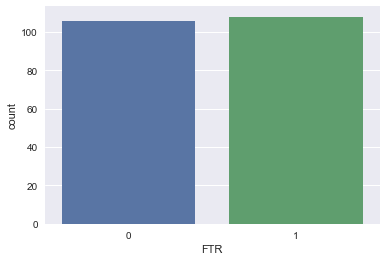

In [58]:
sns.countplot(x='FTR', data=df_fxe)

In [59]:
# Características
X = df_fxe.drop('FTR',axis=1)
# Alvo da previsão
y = df_fxe['FTR']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

# Regressão Logística
logistic_regression = LogisticRegression(solver='lbfgs', multi_class='auto')
logistic_regression.fit(X_train, y_train)
predict_logistic_regression = logistic_regression.predict(X_test)
reg_log_fxe = logistic_regression.score(X_test, y_test) * 100
cross_log_fxe = max(cross_val_score(logistic_regression, X, y, cv=10)) * 100

# Árvore de Decisão
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predict_decision_tree = decision_tree.predict(X_test)
dec_tree_fxe = decision_tree.score(X_test, y_test) * 100
cross_dec_tree_fxe = max(cross_val_score(decision_tree, X, y, cv=10)) * 100

# Floresta Aleatória
error_rate = []

for i in range(1,200):
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(X_train, y_train)
    predict_random_forest = random_forest.predict(X_test)
    error_rate.append(np.mean(predict_random_forest!=y_test))
    
random_forest = RandomForestClassifier(n_estimators=error_rate.index(min(error_rate)))
random_forest.fit(X_train, y_train)
predict_random_forest = random_forest.predict(X_test)
rand_for_fxe = random_forest.score(X_test, y_test) * 100
cross_rand_for_fxe = max(cross_val_score(random_forest, X, y, cv=10)) * 100

# KNN
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict_knn = knn.predict(X_test)
    error_rate.append(np.mean(predict_knn!=y_test))
    
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)))
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)
knn_fxe = knn.score(X_test, y_test) * 100
cross_knn_fxe = max(cross_val_score(knn, X, y, cv=10)) * 100

# SVM
param_grid = {'C':[0.1,1,10,100,1000],'gamma': [1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,cv=3,iid=False)
grid.fit(X_train, y_train)
predict_svm = grid.predict(X_test)
svm_fxe = grid.score(X_test, y_test) * 100

grid2 = GridSearchCV(SVC(),param_grid,refit=True,cv=10,iid=False)
grid2.fit(X_train, y_train)
cross_svm_fxe = grid2.score(X_test, y_test) * 100

# MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=(2,8), activation='logistic', solver='adam', max_iter=1000)
mlp_classifier.fit(X_train,y_train)
predict_mlp_classifier = mlp_classifier.predict(X_test)
mlp_fxe = mlp_classifier.score(X_test, y_test) * 100
cross_mlp_fxe = max(cross_val_score(mlp_classifier, X, y, cv=10)) * 100

In [60]:
print('\nRegressão logística: %.2f' %reg_log_fxe + "%")
print('\nÁrvore de decisão: %.2f' %dec_tree_fxe + "%")
print('\nFloresta aleatória: %.2f' %rand_for_fxe + "%")
print('\nKNN: %.2f' %knn_fxe + "%")
print('\nSVM: %.2f' %svm_fxe + "%")
print('\nMLP: %.2f' %mlp_fxe + "%")


Regressão logística: 69.23%

Árvore de decisão: 56.92%

Floresta aleatória: 66.15%

KNN: 70.77%

SVM: 70.77%

MLP: 49.23%


In [61]:
print("Cross Validation")
print('\nRegressão logística: %.2f' %cross_log_fxe + "%")
print('\nÁrvore de decisão: %.2f' %cross_dec_tree_fxe + "%")
print('\nFloresta aleatória: %.2f' %cross_rand_for_fxe + "%")
print('\nKNN: %.2f' %cross_knn_fxe + "%")
print('\nSVM: %.2f' %cross_svm_fxe + "%")
print('\nMLP: %.2f' %cross_mlp_fxe + "%")

Cross Validation

Regressão logística: 77.27%

Árvore de decisão: 63.64%

Floresta aleatória: 72.73%

KNN: 85.71%

SVM: 69.23%

MLP: 52.38%


## Resultados

In [62]:
print("Casa x Fora x Empate")
print('\nRegressão logística: %.2f' %reg_log_all + "%")
print('\nÁrvore de decisão: %.2f' %dec_tree_all + "%")
print('\nFloresta aleatória: %.2f' %rand_for_all + "%")
print('\nKNN: %.2f' %knn_all + "%")
print('\nSVM: %.2f' %svm_all + "%")
print('\nMLP: %.2f' %mlp_all + "%")

print("\nCross Validation")
print('\nRegressão logística: %.2f' %cross_log_all + "%")
print('\nÁrvore de decisão: %.2f' %cross_dec_tree_all + "%")
print('\nFloresta aleatória: %.2f' %cross_rand_for_all + "%")
print('\nKNN: %.2f' %cross_knn_all + "%")
print('\nSVM: %.2f' %cross_svm_all + "%")
print('\nMLP: %.2f' %cross_mlp_all + "%")

print("\n\nCasa x Fora")
print('\nRegressão logística: %.2f' %reg_log_cxf + "%")
print('\nÁrvore de decisão: %.2f' %dec_tree_cxf + "%")
print('\nFloresta aleatória: %.2f' %rand_for_cxf + "%")
print('\nKNN: %.2f' %knn_cxf + "%")
print('\nSVM: %.2f' %svm_cxf + "%")
print('\nMLP: %.2f' %mlp_cxf + "%")

print("\nCross Validation")
print('\nRegressão logística: %.2f' %cross_log_cxf + "%")
print('\nÁrvore de decisão: %.2f' %cross_dec_tree_cxf + "%")
print('\nFloresta aleatória: %.2f' %cross_rand_for_cxf + "%")
print('\nKNN: %.2f' %cross_knn_cxf + "%")
print('\nSVM: %.2f' %cross_svm_cxf + "%")
print('\nMLP: %.2f' %cross_mlp_cxf + "%")

print("\n\nCasa x Empate")
print('\nRegressão logística: %.2f' %reg_log_cxe + "%")
print('\nÁrvore de decisão: %.2f' %dec_tree_cxe + "%")
print('\nFloresta aleatória: %.2f' %rand_for_cxe + "%")
print('\nKNN: %.2f' %knn_cxe + "%")
print('\nSVM: %.2f' %svm_cxe + "%")
print('\nMLP: %.2f' %mlp_cxe + "%")

print("\nCross Validation") 
print('\nRegressão logística: %.2f' %cross_log_cxe + "%")
print('\nÁrvore de decisão: %.2f' %cross_dec_tree_cxe + "%")
print('\nFloresta aleatória: %.2f' %cross_rand_for_cxe + "%")
print('\nKNN: %.2f' %cross_knn_cxe + "%")
print('\nSVM: %.2f' %cross_svm_cxe + "%")
print('\nMLP: %.2f' %cross_mlp_cxe + "%")

print("\n\nFora x Empate")
print('\nRegressão logística: %.2f' %reg_log_fxe + "%")
print('\nÁrvore de decisão: %.2f' %dec_tree_fxe + "%")
print('\nFloresta aleatória: %.2f' %rand_for_fxe + "%")
print('\nKNN: %.2f' %knn_fxe + "%")
print('\nSVM: %.2f' %svm_fxe + "%")
print('\nMLP: %.2f' %mlp_fxe + "%")

print("\nCross Validation")
print('\nRegressão logística: %.2f' %cross_log_fxe + "%")
print('\nÁrvore de decisão: %.2f' %cross_dec_tree_fxe + "%")
print('\nFloresta aleatória: %.2f' %cross_rand_for_fxe + "%")
print('\nKNN: %.2f' %cross_knn_fxe + "%")
print('\nSVM: %.2f' %cross_svm_fxe + "%")
print('\nMLP: %.2f' %cross_mlp_fxe + "%")

Casa x Fora x Empate

Regressão logística: 62.28%

Árvore de decisão: 50.88%

Floresta aleatória: 64.91%

KNN: 60.53%

SVM: 64.91%

MLP: 61.40%

Cross Validation

Regressão logística: 71.79%

Árvore de decisão: 61.54%

Floresta aleatória: 66.67%

KNN: 69.23%

SVM: 64.91%

MLP: 64.10%


Casa x Fora

Regressão logística: 82.93%

Árvore de decisão: 74.39%

Floresta aleatória: 73.17%

KNN: 80.49%

SVM: 78.05%

MLP: 78.05%

Cross Validation

Regressão logística: 89.29%

Árvore de decisão: 75.00%

Floresta aleatória: 85.71%

KNN: 89.29%

SVM: 84.15%

MLP: 92.86%


Casa x Empate

Regressão logística: 67.47%

Árvore de decisão: 62.65%

Floresta aleatória: 72.29%

KNN: 69.88%

SVM: 67.47%

MLP: 57.83%

Cross Validation

Regressão logística: 75.00%

Árvore de decisão: 78.57%

Floresta aleatória: 82.14%

KNN: 82.14%

SVM: 67.47%

MLP: 71.43%


Fora x Empate

Regressão logística: 69.23%

Árvore de decisão: 56.92%

Floresta aleatória: 66.15%

KNN: 70.77%

SVM: 70.77%

MLP: 49.23%

Cross Validation


In [63]:
sns.set(font_scale=1.1)

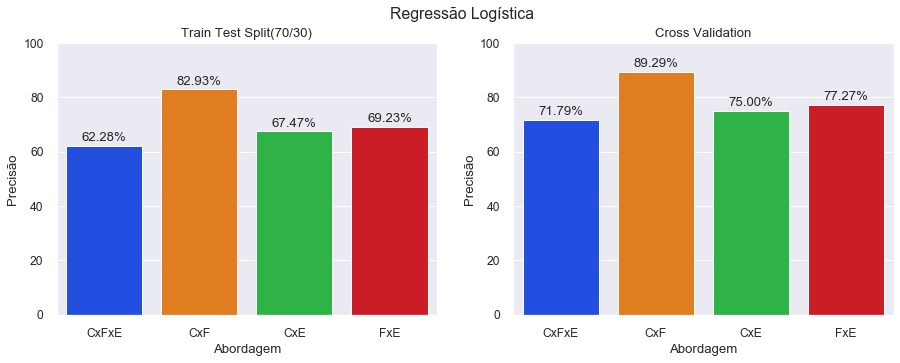

In [64]:
# Regressões Logística
plt.figure(figsize=(15,5))
plt.suptitle('Regressão Logística')

plt.subplot(1, 2, 1)
plt.title("Train Test Split(70/30)")
graph = sns.barplot(x=['CxFxE','CxF','CxE','FxE'], y=[reg_log_all,reg_log_cxf,reg_log_cxe,reg_log_fxe],palette='bright')
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.title("Cross Validation")
graph2 = sns.barplot(x=['CxFxE','CxF','CxE','FxE'], y=[cross_log_all,cross_log_cxf,cross_log_cxe,cross_log_fxe],palette='bright')
for p in graph2.patches:
    graph2.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.savefig('img/regressao_logistica_sa.png')

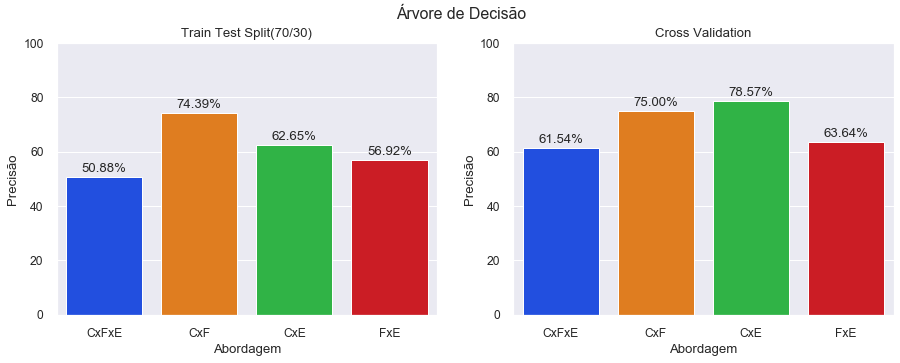

In [65]:
# Árvore de Decisão
plt.figure(figsize=(15,5))
plt.suptitle('Árvore de Decisão')

plt.subplot(1, 2, 1)
plt.title("Train Test Split(70/30)")
graph = sns.barplot(x=['CxFxE','CxF','CxE','FxE'], y=[dec_tree_all,dec_tree_cxf,dec_tree_cxe,dec_tree_fxe],palette='bright')
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.title("Cross Validation")
graph2 = sns.barplot(x=['CxFxE','CxF','CxE','FxE'], y=[cross_dec_tree_all,cross_dec_tree_cxf,cross_dec_tree_cxe,cross_dec_tree_fxe],palette='bright')
for p in graph2.patches:
    graph2.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.savefig('img/arvore_decisao_sa.png')

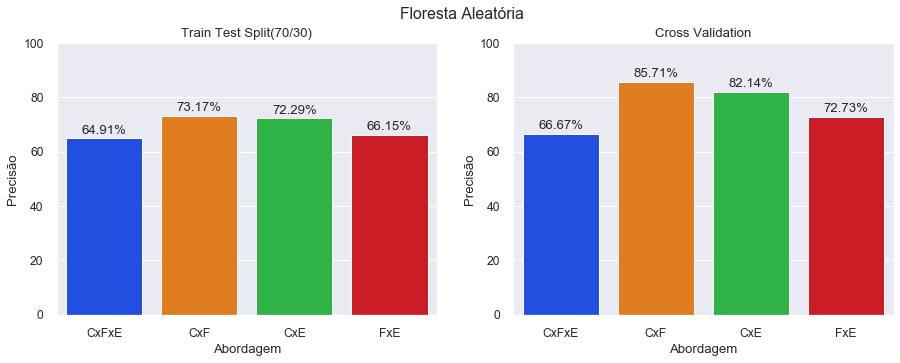

In [66]:
# Floresta Aleatória
plt.figure(figsize=(15,5))
plt.suptitle('Floresta Aleatória')

plt.subplot(1, 2, 1)
plt.title("Train Test Split(70/30)")
graph = sns.barplot(x=['CxFxE','CxF','CxE','FxE'], y=[rand_for_all,rand_for_cxf,rand_for_cxe,rand_for_fxe],palette='bright')
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.title("Cross Validation")
graph2 = sns.barplot(x=['CxFxE','CxF','CxE','FxE'], y=[cross_rand_for_all,cross_rand_for_cxf,cross_rand_for_cxe,cross_rand_for_fxe],palette='bright')
for p in graph2.patches:
    graph2.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.savefig('img/floresta_aleatoria_sa.png')

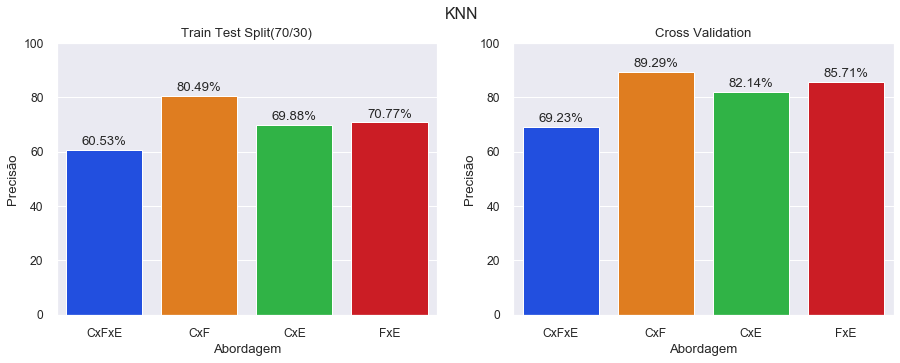

In [67]:
# KNN
plt.figure(figsize=(15,5))
plt.suptitle('KNN')

plt.subplot(1, 2, 1)
plt.title("Train Test Split(70/30)")
graph = sns.barplot(x=['CxFxE','CxF','CxE','FxE'], y=[knn_all,knn_cxf,knn_cxe,knn_fxe],palette='bright')
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.title("Cross Validation")
graph2 = sns.barplot(x=['CxFxE','CxF','CxE','FxE'], y=[cross_knn_all,cross_knn_cxf,cross_knn_cxe,cross_knn_fxe],palette='bright')
for p in graph2.patches:
    graph2.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.savefig('img/knn_sa.png')

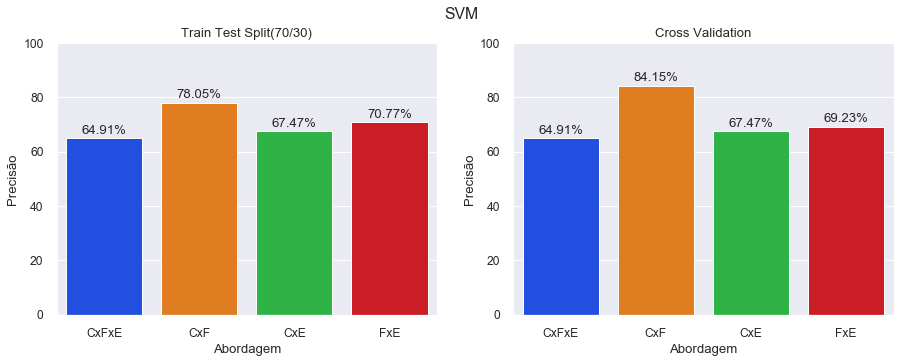

In [68]:
# SVM
plt.figure(figsize=(15,5))
plt.suptitle('SVM')

plt.subplot(1, 2, 1)
plt.title("Train Test Split(70/30)")
graph = sns.barplot(x=['CxFxE','CxF','CxE','FxE'], y=[svm_all,svm_cxf,svm_cxe,svm_fxe],palette='bright')
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.title("Cross Validation")
graph2 = sns.barplot(x=['CxFxE','CxF','CxE','FxE'], y=[cross_svm_all,cross_svm_cxf,cross_svm_cxe,cross_svm_fxe],palette='bright')
for p in graph2.patches:
    graph2.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.savefig('img/svm_sa.png')

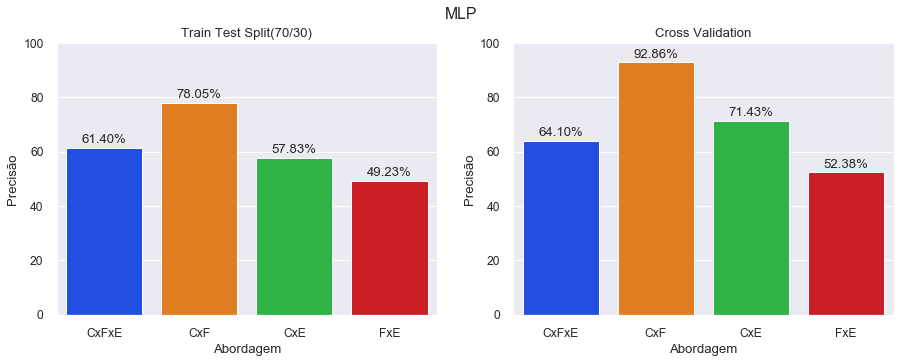

In [69]:
# MLP
plt.figure(figsize=(15,5))
plt.suptitle('MLP')

plt.subplot(1, 2, 1)
plt.title("Train Test Split(70/30)")
graph = sns.barplot(x=['CxFxE','CxF','CxE','FxE'], y=[mlp_all,mlp_cxf,mlp_cxe,mlp_fxe],palette='bright')
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.title("Cross Validation")
graph2 = sns.barplot(x=['CxFxE','CxF','CxE','FxE'], y=[cross_mlp_all,cross_mlp_cxf,cross_mlp_cxe,cross_mlp_fxe],palette='bright')
for p in graph2.patches:
    graph2.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.savefig('img/mlp_sa.png')

#### Considerações

Os algoritmos performam melhor com modelos binários.  
É mais fácil classificar casa e fora, podemos perceber que os testes feitos com empate tem menor resultado.